# Preparations

In [25]:
import sys
import math
import numpy as np

%matplotlib inline
import matplotlib.colors
import matplotlib.pyplot as plt

sys.path.append('..')
from higgs_inference import settings

# Settings

In [45]:
metrics_filenames = ['logr', 'ce', 'scores']
metrics_labels = [r'MSE $\log \ r$', 'Cross entropy', 'MSE scores']
n_metrics = len(metrics_filenames)
metrics_max = [.17, 2., 12.]

strategies_filenames = ['carl', 'combined', 'regression', 'combinedregression',
                        'carl_smeared', 'combined_smeared', 'regression_smeared']
strategies_folders = ['parameterized'] * len(strategies_filenames)
strategies_labels = ['carl', 'carl + score', 'ratio regression', 'ratio regr. + score',
                     'carl (w/ smearing)', 'carl + score (w/ smearing)', 'ratio regr. (w/ smearing)']
strategies_panel = [0, 0, 0, 0, 1, 1, 1]
n_panels = max(strategies_panel) + 1


In [41]:
colors = ['C' + str(i) for i in range(10)]

# Load data

In [42]:
metrics = []  # Indexed by [strategy][metric][train/validation][epoch]
result_dir = '../results'

for sfile, sfolder in zip(strategies_filenames, strategies_folders):
    line = []
    for met in metrics_filenames:
        line.append(np.load(result_dir + '/' + sfolder + '/traininghistory_' + met + '_' + sfile + '.npy') )
    metrics.append(line)

# Metric by metric

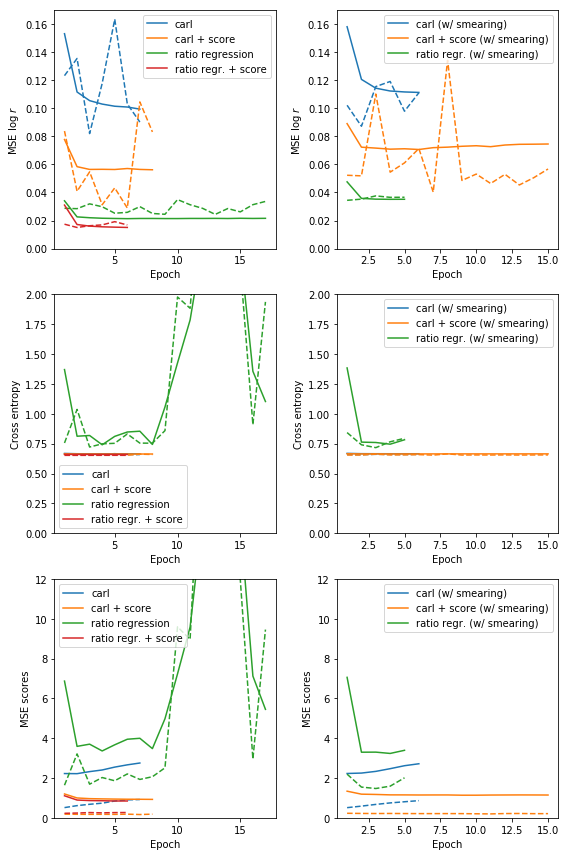

In [46]:
plt.figure(figsize=(n_panels*4., n_metrics*4))

for p in range(n_panels):

    for m, mlabel in enumerate(metrics_labels):
        
        plt.subplot(n_metrics, n_panels, m * n_panels + p + 1)
        i = 0
        
        for s, (spanel, slabel) in enumerate(zip(strategies_panel, strategies_labels)):
            if spanel != p:
                continue
                
            # Training data
            _y = metrics[s][m][0]
            _x = np.array(list(range(len(_y)))) + 1
            plt.plot(_x, _y, c=colors[i], ls='-', label=slabel)

            # Validation set
            _y = metrics[s][m][1]
            _x = np.array(list(range(len(_y)))) + 1
            plt.plot(_x, _y, c=colors[i], ls='--')
            
            i += 1
        
        plt.legend()
        
        plt.ylim(0.,metrics_max[m])
        
        plt.xlabel('Epoch')
        plt.ylabel(mlabel)

plt.tight_layout()
plt.savefig('../figures/learning_curves/learning_curves.pdf')